In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from imutils import paths
from sklearn.model_selection import train_test_split

In [22]:
#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

import seaborn as sb

In [23]:
import sklearn.metrics as sm
from sklearn.svm import SVC

In [24]:
def calc_accuracy(method, label_test, predIdxs):
    print("\n\nACCURACY Score for ", method, sm.accuracy_score(label_test, predIdxs))

In [25]:
def predict_svm(X_train, X_test, y_train, y_test):
    svc = SVC(kernel='linear')
    print("\nTraining of SVM started")
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    calc_accuracy("SVM", y_test, y_pred)

###RSNA (N) and CheXpert (N)

In [26]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/RSNA/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Chexpert/Normal"

In [27]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [28]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
200


In [29]:
imagePaths = []

In [30]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [31]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [32]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [33]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [34]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 256, 256, 3)
(400,)


In [35]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [36]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 196608)
(400, 1)


In [37]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [39]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(10, 10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 720x720 with 1 Axes>,
 [Text(2.2833736, 3.0277379, '0'),
  Text(0.39037317, -3.3966365, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


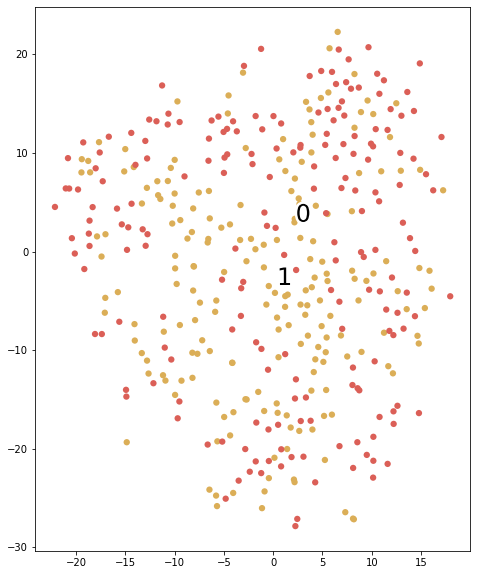

In [40]:
plot(digits_final, classes)

In [41]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [42]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [43]:
# Images for Training set
len(train_data_list)

360

In [44]:
# Images for Validation set
len(val_data_list)

40

In [45]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.6


###RSNA (P) and CheXpert (P)

In [46]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/RSNA/Pneumonia"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Chexpert/Pneumonia"

In [47]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [48]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
200


In [49]:
imagePaths = []

In [50]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [51]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [52]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [53]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [54]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 256, 256, 3)
(400,)


In [55]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [56]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 196608)
(400, 1)


In [57]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [59]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(10, 10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 720x720 with 1 Axes>,
 [Text(-0.0071456265, 0.85942423, '0'),
  Text(-1.5468304, 0.20091629, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


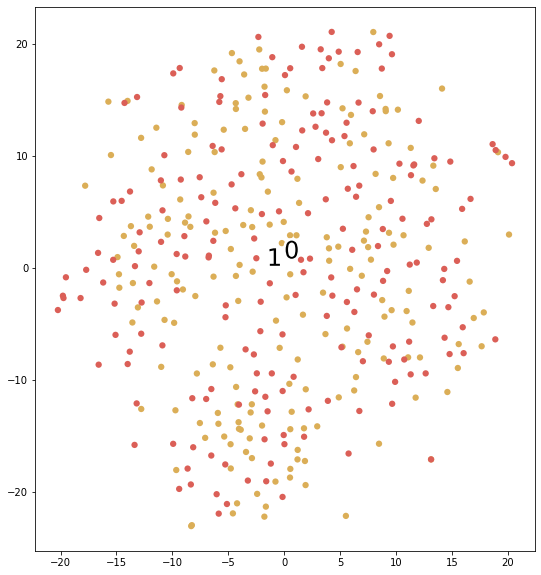

In [60]:
plot(digits_final, classes)

In [61]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [62]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [63]:
# Images for Training set
len(train_data_list)

360

In [64]:
# Images for Validation set
len(val_data_list)

40

In [65]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.75


###Montgomery (N) and Shenzhen (N)

In [66]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Montgomery/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Shenzhen/Normal"

In [67]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [68]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

80
200


In [69]:
imagePaths = []

In [70]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [71]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [72]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [73]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [74]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 256, 256, 3)
(280,)


In [75]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [76]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 196608)
(280, 1)


In [77]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [79]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(-14.14624, 18.037586, '0'),
  Text(3.1633916, -2.1553178, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


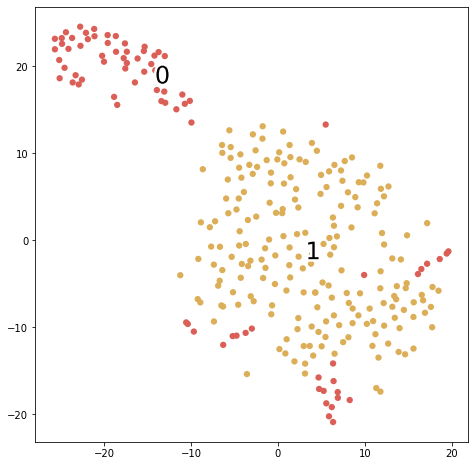

In [80]:
plot(digits_final, classes)

In [81]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [82]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [83]:
# Images for Training set
len(train_data_list)

252

In [84]:
# Images for Validation set
len(val_data_list)

28

In [85]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 1.0


###Montgomery (O) and Shenzhen (O)

In [86]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Montgomery/Other"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Shenzhen/Other"

In [87]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [88]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

58
200


In [89]:
imagePaths = []

In [90]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [91]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [92]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [93]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [94]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(258, 256, 256, 3)
(258,)


In [95]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [96]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(258, 196608)
(258, 1)


In [97]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [99]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(15.575131, -6.5910554, '0'),
  Text(-1.6270756, 1.3693686, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


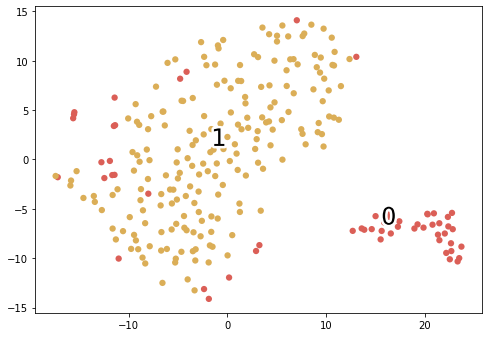

In [100]:
plot(digits_final, classes)

In [101]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [102]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [103]:
# Images for Training set
len(train_data_list)

232

In [104]:
# Images for Validation set
len(val_data_list)

26

In [105]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.9615384615384616


###CheXpert (N) and Montgomery (N)

In [106]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Chexpert/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Montgomery/Normal"

In [107]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [108]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
80


In [109]:
imagePaths = []

In [110]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [111]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [112]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [113]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [114]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 256, 256, 3)
(280,)


In [115]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [116]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 196608)
(280, 1)


In [117]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [119]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(3.669928, -3.3349383, '0'),
  Text(-9.101843, 14.82099, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


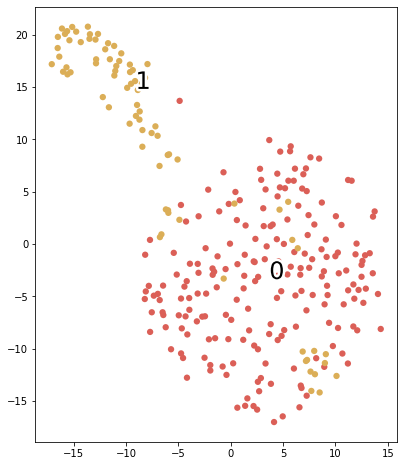

In [120]:
plot(digits_final, classes)

In [121]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [122]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [123]:
# Images for Training set
len(train_data_list)

252

In [124]:
# Images for Validation set
len(val_data_list)

28

In [125]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 1.0


###CheXpert (N) and Shenzhen (N)

In [126]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Chexpert/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Shenzhen/Normal"

In [127]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [128]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
200


In [129]:
imagePaths = []

In [130]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [131]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [132]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [133]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [134]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 256, 256, 3)
(400,)


In [135]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [136]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 196608)
(400, 1)


In [137]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [139]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(-10.13661, 10.509723, '0'),
  Text(5.052557, -6.4391046, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


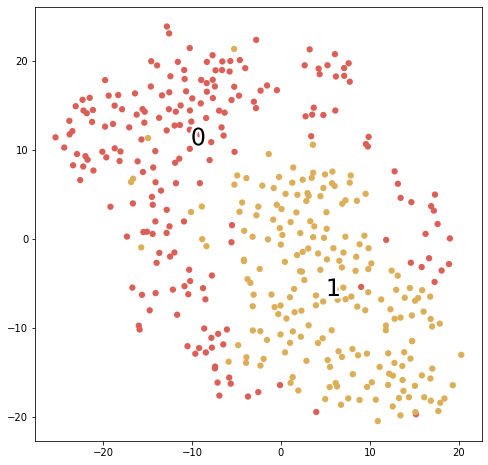

In [140]:
plot(digits_final, classes)

In [141]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [142]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [143]:
# Images for Training set
len(train_data_list)

360

In [144]:
# Images for Validation set
len(val_data_list)

40

In [145]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.975


###RSNA (N) and Montgomery (N)

In [146]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/RSNA/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Montgomery/Normal"

In [147]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [148]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
80


In [149]:
imagePaths = []

In [150]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [151]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [152]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [153]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [154]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 256, 256, 3)
(280,)


In [155]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [156]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(280, 196608)
(280, 1)


In [157]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [159]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(14.992489, 11.526549, '0'),
  Text(-3.1649728, -2.7202315, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


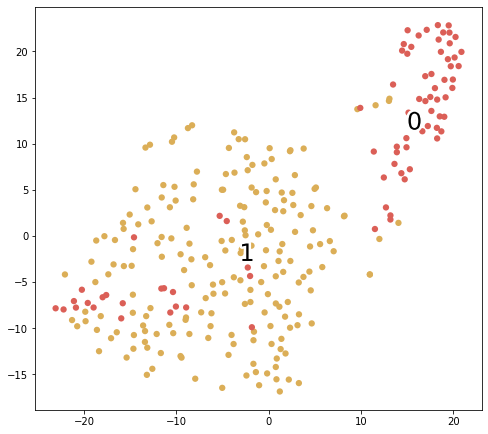

In [160]:
plot(digits_final, classes)

In [161]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [162]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [163]:
# Images for Training set
len(train_data_list)

252

In [164]:
# Images for Validation set
len(val_data_list)

28

In [165]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.9642857142857143


###RSNA (N) and Shenzhen (N)

In [166]:
# Path for the Testing Dataset
test_normal_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/RSNA/Normal"
test_pneumonia_dataset_path = "/content/drive/MyDrive/CXR/FINAL_CXR/Preprocessing/New_preprocess_histogram_fb_gamma/Shenzhen/Normal"

In [167]:
normal_imagePaths = list(paths.list_images(test_normal_dataset_path))
pneumonia_imagePaths = list(paths.list_images(test_pneumonia_dataset_path))

In [168]:
# Total Images for Training
print(len(normal_imagePaths))
print(len(pneumonia_imagePaths))

200
200


In [169]:
imagePaths = []

In [170]:
for imagePath in normal_imagePaths:
  imagePaths.append(imagePath)

In [171]:
for imagePath in pneumonia_imagePaths:
  imagePaths.append(imagePath)

In [172]:
data = []   # List that will contain numpy arrays having pixel values of different images
labels = []  # List that will contain corresponding labels

# loop over the image paths
for imagePath in imagePaths:

    # Extract the class label from the filename
    label = imagePath.split(os.path.sep)[-3]
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [173]:
# convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]
data = np.array(data) / 255.0   # Normalisation of data
labels = np.array(labels)

In [174]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 256, 256, 3)
(400,)


In [175]:
data = data.reshape((data.shape[0], 256*256*3))
labels = labels.reshape((data.shape[0], 1))

In [176]:
# Shape of array data and labels
print(data.shape)
print(labels.shape)

(400, 196608)
(400, 1)


In [177]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
classes = label_encoder.fit_transform(labels)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
digits_final = TSNE(perplexity=30, random_state=101).fit_transform(data) 

In [179]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(2.3021822, -9.277722, '0'),
  Text(1.2181451, 7.066677, '1'),
  Text(nan, nan, '2'),
  Text(nan, nan, '3'),
  Text(nan, nan, '4'),
  Text(nan, nan, '5'),
  Text(nan, nan, '6'),
  Text(nan, nan, '7'),
  Text(nan, nan, '8'),
  Text(nan, nan, '9')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


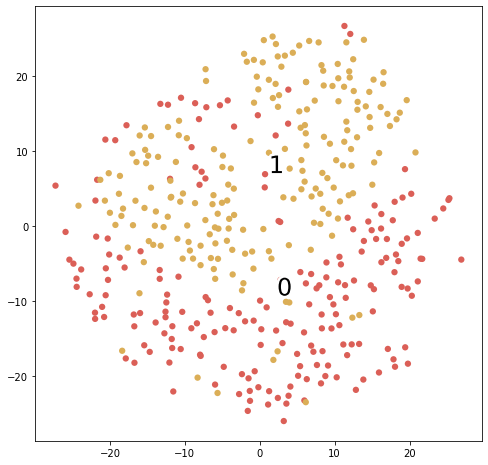

In [180]:
plot(digits_final, classes)

In [181]:
# For storing the class labels for Training and Validation datasets
train_class_list = []
val_class_list = []

# For storing the paths of images for Training and Validation datasets
train_data_list = []
val_data_list = []

In [182]:
# Training and Validation split
(train_data_list, val_data_list, train_class_list, val_class_list) = train_test_split(data,
                                                                                      classes,
                                                                                      test_size = 0.1,
                                                                                      stratify = classes,
                                                                                      random_state = 101)

In [183]:
# Images for Training set
len(train_data_list)

360

In [184]:
# Images for Validation set
len(val_data_list)

40

In [185]:
predict_svm(train_data_list, val_data_list, train_class_list, val_class_list)


Training of SVM started


ACCURACY Score for  SVM 0.975
